In [2]:
import scanpy as sc
import Topyfic
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')

In [ ]:
data = sc.read_h5ad("../data/ModelAD_5x_seurat_only_microglia.h5ad")

In [ ]:
top_model = Topyfic.read_topModel(f"../../Training/sc_microgllia/5/topModel_sc_only_microglia_5.p")


## analysis

In [9]:
analysis_top_model = Topyfic.Analysis(Top_model=top_model)
analysis_top_model.calculate_cell_participation(data=data)
analysis_top_model.save_analysis()

Saving analysis class as analysis_sc_only_microglia_5.p


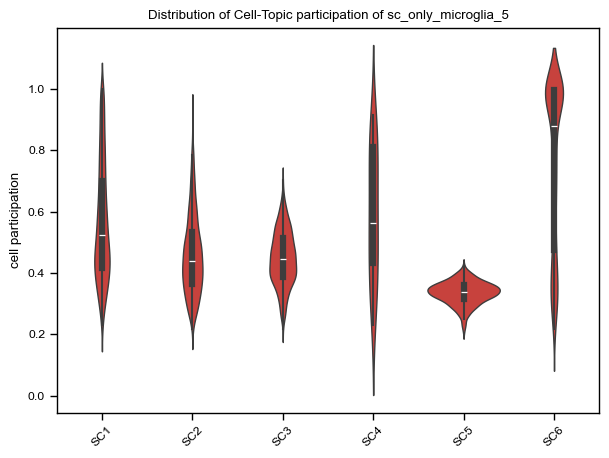

In [12]:
label = dict()
for i in range(analysis_top_model.top_model.N):
    key = f"Topic_{i+1}"
    value = f"SC{i+1}"
    label[key] = value

analysis_top_model.cell_participation_distribution(plot_type="violin",
                                         threshold=0.05,
                                         max_topic=True,
                                         label=label,
                                         color="#DE2D26",
                                                   figsize=(7, 5),
                                         save=True,
                                         show=True,
                                         file_format="pdf",
                                         file_name="figures/sc_microglia_dist_cell_participation")

,5xFADHEMI,5xFADWT
Topic_1,28.667823,10.810836
Topic_2,13.155257,21.556085
Topic_3,21.717089,31.00235
Topic_4,0.977051,1.943797
Topic_5,15.80266,21.967544
Topic_6,19.68012,12.719389


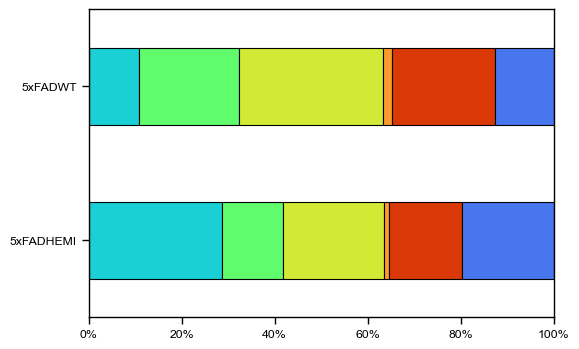

In [23]:
#analysis_top_model = Topyfic.read_analysis(f"analysis_sn_ModelAD_ENCODE_allGenes.p")
cell_participation = analysis_top_model.cell_participation
cell_participation = cell_participation[cell_participation.obs.celltypes == "Microglia"]

category = cell_participation.obs.species.unique().tolist()

df_plot = pd.DataFrame(index=cell_participation.var.index.tolist(),
                       columns=category)

for i in range(len(category)):
    tissue = cell_participation.obs[cell_participation.obs.species == category[i]]
    tmp = cell_participation.to_df().loc[tissue.index, :]
    order = tmp.mean().sort_values(ascending=False).index.tolist()
    index = tmp[order].sort_values(by=order, ascending=False).index.tolist()
    tmp = tmp.reindex(columns=order)
    tmp = tmp.reindex(index)
    tmp = tmp.mean()
    df_plot.loc[tmp.index, category[i]] = tmp.values

df_plot = df_plot * 100


fig, ax = plt.subplots(figsize=(6, 4), facecolor='white')

df_plot.T.plot(kind='barh', 
               stacked=True, 
               color=analysis_top_model.colors_topics.colors,
               edgecolor="Black",
               legend=False,
               ax=ax)

ax.set_xlim(0, 100)
#ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
#ax.set_title("Microglia")

fig.savefig("figures/fig3c.pdf")
df_plot

In [14]:
celltype = data.obs.species.unique().tolist()
file_name = f"figures/pieChart_Microglia"
analysis_top_model.pie_structure_Chart(level='species',
                                           category=celltype,
                                           n=5,
                                            save=True,
                                            show=False,
                                           file_format='pdf',
                                            file_name=file_name)

In [15]:
my_palette_timepoint = {'PNM_08': 'purple',}

my_palette_sex = {'Female': 'pink',
                  'Male': 'royalblue'}

my_palette_species = {'5xFADHEMI': 'orange',
                  '5xFADWT': 'lime'}

my_palette = {'species': my_palette_species,
              'sex': my_palette_sex,
              'timepoint' : my_palette_timepoint,}

In [16]:
celltypes = data.obs.celltypes.unique().tolist()
file_name = f"figures/structurePlot_{celltypes[0]}"
analysis_top_model.structure_plot(level='celltypes',
                                      category=celltypes, 
                                      metaData=['species', "sex"],
                                      metaData_palette=my_palette,
                                      order_cells=["species", "sex", "hierarchy"],
                                      save=True,
                                      show=False,
                                      file_format='pdf',
                                      file_name=file_name)

                                           sex species
cellID                                                
TGGCTTCAAACGTGAT_7.12A.sc_5xFADHEMI_8m_F_1   0       0
GTACGCAAAAGACGGA_7.12A.sc_5xFADHEMI_8m_F_1   0       0
TTCACGCAACAGATTC_7.12A.sc_5xFADHEMI_8m_F_1   0       0
TGGTGGTAACAGCAGA_7.12A.sc_5xFADHEMI_8m_F_1   0       0
CAGATCTGAGAGTCAA_7.12A.sc_5xFADHEMI_8m_F_1   0       0
...                                         ..     ...
ACGCTCGATAGGATGA_36.12F.sc_5xFADWT_8m_M_2    1       1
AACGTGATTATCAGCA_36.12F.sc_5xFADWT_8m_M_2    1       1
CATCAAGTTGGAACAA_36.12F.sc_5xFADWT_8m_M_2    1       1
AGTCACTATGGTGGTA_36.12F.sc_5xFADWT_8m_M_2    1       1
ATCCTGTATTCACGCA_36.12F.sc_5xFADWT_8m_M_2    1       1

[5546 rows x 2 columns]


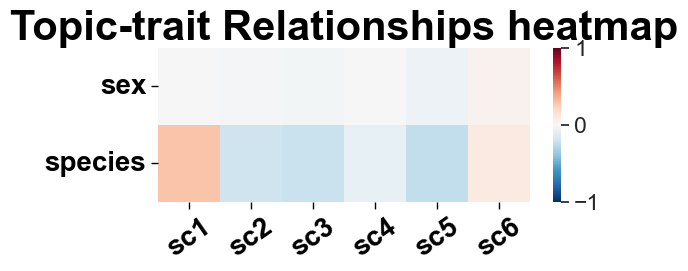

In [45]:
metadata = ["sex", "species"]
TopicTraitRelationshipHeatmap(analysis_top_model,
                                      metadata,
                                      save=True,
                                      show=True,
                                      file_format="pdf",
                                      file_name='figures/topic-traitRelationships')

Reading TopModel done!
Reading TopModel done!


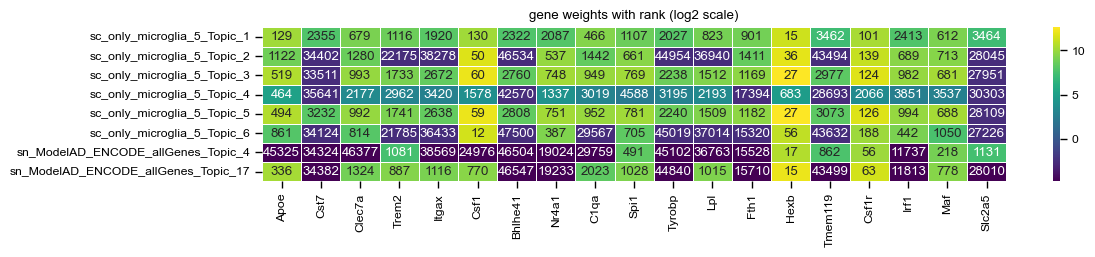

In [41]:
top_model = Topyfic.read_topModel(f"topModel_sc_only_microglia_5.p")
gene_weights = top_model.get_gene_weights()

top_model = Topyfic.read_topModel(f"../../../sn_allgenes_5xFAD_control_combine/15_topmodel_half/rep2/topModel_sn_ModelAD_ENCODE_allGenes.p")
tmp = top_model.get_gene_weights()
tmp = tmp[['sn_ModelAD_ENCODE_allGenes_Topic_4', 'sn_ModelAD_ENCODE_allGenes_Topic_17']]

gene_weight = pd.concat([gene_weights, tmp], axis=1)

DAM = ["Apoe",
                                          "Cst7",
                                          "Clec7a", 
                                          #"Gpnmb",
                                          "Trem2",
                                          "Itgax",
                                          #"Spp1",
                                          "Csf1",
                                          "Bhlhe41", 
                                          "Nr4a1", 
                                          #"Id2",
                                          "C1qa",
                                          "Spi1",
                                          "Tyrobp",
                                          "Lpl",
                                          "Fth1",
                                          "Hexb",
                                          "Tmem119", 
                                          "Csf1r", 
                                          "Irf1", 
                                          #"Cebpb", 
                                          "Maf", 
                                          "Slc2a5"
                                         ]



gene_weight_rank_heatmap(gene_weight,
                         genes=DAM,
                         scale="log2",
                                   figsize=(12, 2),
                                   file_format="pdf",
                                   file_name="figures/gene_weight_rank_heatmap_microglia")

Reading TopModel done!


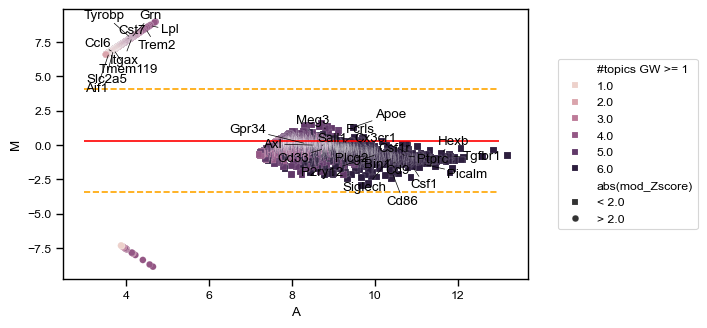

In [3]:
top_model = Topyfic.read_topModel(f"topModel_sc_only_microglia_5.p")

size = top_model.get_gene_weights().copy(deep=True)
size[size > 1] = 1
size[size< 1] = 0

size = pd.DataFrame(size.sum(axis=1))

DAM = ['Grn', 'Trem2', 'Tyrobp', 'Apoe', 'Lpl', 'Axl', 'Cd9',
       'Cd163', 'Cd14', 'Cd86', 'Mrc1', 'Lst1', 'Ptprc', 'Msr1',
       'Aif1', 'Hla-dra', 'Tmem119', 'Hexb', 'Cx3cr1', 'P2ry12',
       'Csf1r', 'Gpr34', 'Tgfbr1', 'Fcrls', 'Siglech', 'Slc2a5', 
       'Sall1', 'Cst7', 'Itgax', 'Spp1', 'Csf1', 'Ccl6', 'Csf1'
       'Ms4a6a', 'Cd33', 'Bin1', 'Picalm', 'Plcg2',
       'Meg3', 'Spp1']
plt.figure(figsize=(6, 3.5))
gene_zscore = top_model.MA_plot(topic1="sc_only_microglia_5_Topic_1", 
                                topic2="sc_only_microglia_5_Topic_2", 
                                size=size,
                                pseudocount=1, 
                                threshold=2,
                                cutoff=2.0, 
                                labels=DAM,
                                file_name="figures/MA_plot/microglia_1_2")